In [1]:
import pandas as pd

meta = pd.read_csv('../data/meta.txt', sep='\t', skiprows=31, index_col=0)
names = dict(zip(meta.columns, meta.iloc[10]))

df = pd.read_csv('../data/gsea_input/normalized.gct', sep='\t', skiprows=2, index_col=0)
del df['Description']

df = df.rename(columns=names)
df

,moa: cell wall synthesis inhibitor / lipoprotein,moa: cell wall synthesis inhibitor / lipoprotein,moa: cell wall synthesis inhibitor / lipoprotein,moa: new hit,moa: new hit,moa: new hit,moa: cell wall synthesis inhibitor,moa: cell wall synthesis inhibitor,moa: cell wall synthesis inhibitor,moa: Protein synthesis,...,moa: DNA replication inhibitor,moa: DNA replication inhibitor,moa: DNA replication inhibitor,moa: DNA replication inhibitor,moa: Membrane perturbation,moa: Membrane perturbation,moa: Membrane perturbation,moa: Folic Acid synthesis inhibitor,moa: Folic Acid synthesis inhibitor,moa: Folic Acid synthesis inhibitor
NAME,,,,,,,,,,,,,,,,,,,,,
kdpF,3.845345,16.393786,2.087954,8.413397,6.181493,4.457479,8.172285,2.174020,2.005615,4.445499,...,29.670408,2.472744,8.596201,27.990296,34.088035,20.232780,22.784567,2.225127,5.076747,9.014531
ythA,2.205150,4.344402,2.236387,2.296386,4.217732,1.556919,4.306756,4.522373,4.276124,43.501619,...,5.680767,2.686732,0.107621,0.529633,3.993094,0.034439,0.053779,2.162151,0.164906,7.531667
ymjD,0.437385,0.116890,0.188015,0.180502,0.096737,0.177730,0.287757,0.215351,2.516480,0.567738,...,0.188105,2.983936,0.026905,0.272841,0.097826,0.215242,0.277861,0.146942,0.153127,0.106681
yohO,4.628993,0.185075,7.124773,2.436777,0.270864,3.554609,2.302052,2.655997,0.425720,0.332073,...,7.699759,0.225876,0.282504,0.320990,4.179853,0.198023,4.508512,0.167934,0.117790,0.170689
cbdX,18.725554,17.523720,25.045556,20.336555,24.242285,30.512761,4.556145,24.960215,21.286013,2.581603,...,6.884638,11.507771,9.255378,3.627183,12.450626,19.208226,8.246185,4.964551,2.673832,7.574340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ompC,173542.102801,149860.118432,111809.514806,313345.807463,336319.811885,354918.554044,205827.785290,245116.308831,270851.096429,80448.311612,...,507398.456656,285037.489263,282157.599421,266904.226231,70191.942606,103801.159701,80748.109494,193684.720954,173691.162602,91629.828946
adhE,179193.074105,280572.392113,106353.264837,304546.898180,274623.989016,262672.191817,242594.406569,435228.947768,296294.060143,32558.963840,...,21695.388313,355271.555443,437882.274160,351668.985224,163827.542424,312036.601525,192686.892338,129334.597298,147852.840056,81119.632369
gapA,346377.391110,413344.983841,252890.010796,431963.516791,421794.182365,438240.381446,312677.822583,469024.617928,405139.351867,46395.263735,...,131186.892290,498859.458783,545328.060686,488567.580056,227461.927076,342913.063190,313395.044332,223931.516480,119235.499052,65488.243297


In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
import numpy as np

log = np.array(np.log2(df + 1)).T

pca = PCA(n_components=3)
data = pca.fit_transform(log)
data.shape

(57, 3)

In [3]:
moas = sorted(list(set([i[5:].split(' / ')[0] for i in df.columns])))
cmap = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_index = [moas.index(i[5:].split(' / ')[0]) for i in df.columns]
color = [cmap[i] for i in color_index]

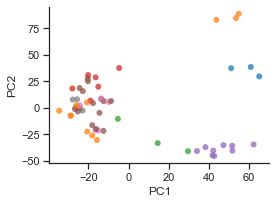

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', rc={'font.sans-serif':'Arial'})

plt.figure(figsize=(4, 3))
plt.scatter(data[:, 0], data[:, 1], c=color, alpha=0.75, linewidths=0)
plt.ylabel('PC2')    
plt.xlabel('PC1')
sns.despine()
plt.tight_layout()
plt.savefig('../figs/pca1.png', dpi=300)

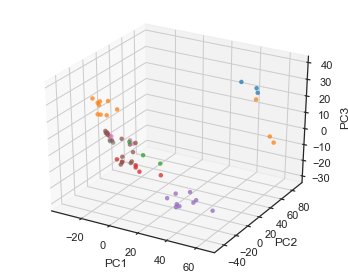

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style='ticks', rc={'font.sans-serif':'Arial'})

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color, alpha=0.75, linewidths=0)
plt.ylabel('PC2')    
plt.xlabel('PC1')
ax.set_zlabel('PC3', rotation='vertical')

sns.despine()
plt.tight_layout()
plt.savefig('../figs/pca2.png', dpi=300)

In [6]:
pls = PLSRegression(n_components=2)
data2 = pls.fit_transform(log, color_index)

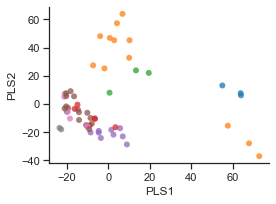

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', rc={'font.sans-serif':'Arial'})

plt.figure(figsize=(4, 3))
plt.scatter(data2[0][:, 0], data2[0][:, 1], c=color, alpha=0.75, linewidths=0)
plt.ylabel('PLS2')    
plt.xlabel('PLS1')
sns.despine()
plt.tight_layout()
plt.savefig('../figs/pca3.png', dpi=300)